## Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
data = pd.read_csv('scrapy/vlrgg/playerData/vlr.csv')
data['date'] = data['date'].apply(lambda x: datetime.strptime(x,'%d-%m-%y'))
data['playerHS'] = data['playerHS'].apply(lambda x: float(str(x).split('%')[0]))

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140356 entries, 0 to 140355
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   playerName        140355 non-null  object        
 1   playerTeam        140316 non-null  object        
 2   map               140356 non-null  object        
 3   playerAgent       140356 non-null  object        
 4   playerKills       140350 non-null  float64       
 5   playerDeaths      140350 non-null  float64       
 6   playerAssists     140350 non-null  float64       
 7   playerACS         140167 non-null  float64       
 8   playerADR         140097 non-null  float64       
 9   playerHS          140177 non-null  float64       
 10  playerFirstBlood  140177 non-null  float64       
 11  playerFirstDeath  140107 non-null  float64       
 12  matchID           140356 non-null  object        
 13  gameID            140356 non-null  object        
 14  oppo

# Data Exploration

## Agent pick rate over time

In [44]:
data.columns

Index(['playerName', 'playerTeam', 'map', 'playerAgent', 'playerKills',
       'playerDeaths', 'playerAssists', 'playerACS', 'playerADR', 'playerHS',
       'playerFirstBlood', 'playerFirstDeath', 'matchID', 'gameID', 'opponent',
       'result', 'winnerRoundsWon', 'loserRoundsWon', 'winningTeam', 'date',
       'event'],
      dtype='object')

In [15]:

sorted_events = data.sort_values('date')['event'].unique()

In [16]:
#agent pick rate over time
agentdata = data.groupby(['event'])['playerAgent'].value_counts(normalize=True).mul(100).unstack(fill_value=0)
agentdata = agentdata.reindex(sorted_events)
agentdata

playerAgent,astra,breach,brimstone,cypher,jett,kayo,killjoy,omen,phoenix,raze,reyna,sage,skye,sova,viper,yoru
event,,,,,,,,,,,,,,,,
Champions Tour LATAM Stage 1: Challengers 1,0.000000,4.570792,6.131550,12.486065,15.719064,0.000000,6.243032,13.935340,4.347826,12.709030,3.455964,3.344482,0.334448,16.722408,0.000000,0.000000
Champions Tour Brazil Stage 1: Challengers 1,0.000000,1.551724,3.103448,9.482759,13.620690,0.000000,10.000000,16.896552,2.241379,15.862069,4.482759,3.793103,0.172414,18.793103,0.000000,0.000000
Champions Tour North America Stage 1: Challengers 1,0.000000,2.418301,3.333333,11.601307,16.209150,0.000000,7.254902,16.470588,6.699346,8.235294,6.339869,2.647059,1.535948,16.307190,0.620915,0.326797
Champions Tour Thailand Stage 1: Challengers 1,0.000000,10.714286,5.000000,10.357143,14.642857,0.000000,9.642857,14.285714,3.928571,10.357143,4.285714,2.142857,0.000000,13.928571,0.714286,0.000000
Champions Tour Malaysia & Singapore Stage 1: Challengers 1,0.000000,3.833333,7.500000,7.666667,15.333333,0.000000,10.166667,11.833333,2.500000,11.666667,7.166667,3.833333,0.333333,17.166667,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Champions Tour EMEA: Last Chance Qualifier,11.142857,1.142857,0.000000,9.714286,14.571429,0.285714,6.285714,3.142857,0.571429,6.285714,3.142857,6.571429,13.428571,14.285714,9.428571,0.000000
Champions Tour South America: Last Chance Qualifier,13.030303,2.424242,0.000000,7.272727,14.848485,2.121212,5.151515,2.424242,0.303030,7.272727,5.757576,10.000000,4.848485,15.151515,9.393939,0.000000
Champions Tour Asia-Pacific: Last Chance Qualifier,17.021277,5.106383,0.212766,5.531915,18.297872,2.127660,7.659574,0.000000,0.000000,3.404255,1.914894,4.042553,13.191489,13.404255,8.085106,0.000000


pandas.core.frame.DataFrame

<AxesSubplot:xlabel='event'>

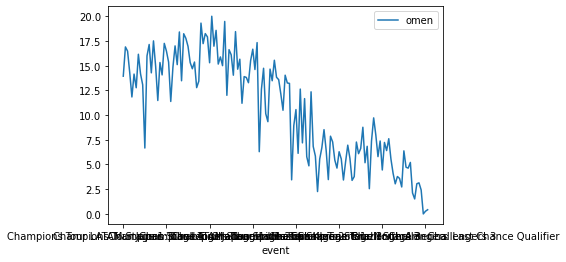

In [18]:
agentdata.plot(y='omen')